<a href="https://colab.research.google.com/github/Nghialego1306/test/blob/main/Traicay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten


In [2]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/Data_traicay'
path_img = []
labels = ['chuoi','duahau','le','man','sapoche','saurieng','tao','thanhlong','thom','xoai']
x_train = []
y_train = []

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
for i in labels:
  path_class = os.path.join(dir_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path_class):
    path_img = os.path.join(path_class,j)
    img = load_img(path_img,target_size=(32,64))
    img = img_to_array(img)
    img = img.astype('float32')
    img = img/255
    x_train.append(img)
    y_train.append(index_label)

In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train)


In [6]:
# Initialize the CNN
model = Sequential()
# Convolution
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,64,3)))
# A second convolution layer
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# Pooling
model.add(MaxPooling2D((2,2)))
# Flattening
model.add(Flatten())
# Full connection
model.add(Flatten())
model.add(Dense(1024,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(256,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation = 'softmax'))

In [7]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=15,batch_size=128,verbose=1)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 2.6980 - accuracy: 0.0577
Epoch 2/15
1/1 [==============================] - 0s 418ms/step - loss: 5.6446 - accuracy: 0.0962
Epoch 3/15
1/1 [==============================] - 0s 418ms/step - loss: 5.9695 - accuracy: 0.0962
Epoch 4/15
1/1 [==============================] - 0s 398ms/step - loss: 2.5796 - accuracy: 0.1154
Epoch 5/15
1/1 [==============================] - 0s 420ms/step - loss: 2.3746 - accuracy: 0.1154
Epoch 6/15
1/1 [==============================] - 0s 397ms/step - loss: 2.3119 - accuracy: 0.1154
Epoch 7/15
1/1 [==============================] - 0s 403ms/step - loss: 2.2925 - accuracy: 0.1538
Epoch 8/15
1/1 [==============================] - 0s 389ms/step - loss: 2.2751 - accuracy: 0.1346
Epoch 9/15
1/1 [==============================] - 0s 387ms/step - loss: 2.2554 - accuracy: 0.2308
Epoch 10/15
1/1 [==============================] - 0s 398ms/step - loss: 2.2264 - accuracy: 0.3462
Epoch 11/15
1/1 [=====

In [8]:
model.save('fruit.h5')
model_pre=load_model('fruit.h5')

(1, 32, 64, 3)

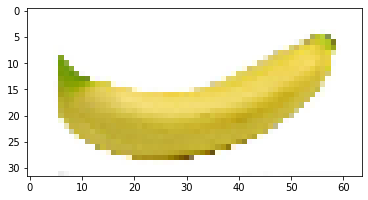

In [10]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Data_traicay/chuoi/20160823_chuoi_1.jpg',target_size=(32,64))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,64,3)
img=img.astype('float32')
img=img/255
img.shape

In [11]:
np.argmax(model_pre.predict(img),axis=1)

array([0])